In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [2]:
automobile_data = pd.read_csv("auto_mobile_data.csv")

In [3]:
automobile_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
automobile_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
automobile_data.replace('?', np.nan, inplace = True)


In [7]:
automobile_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
 width                0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
le = len(automobile_data)

In [9]:
thresold = le * .1
thresold

20.5

In [10]:
automobile_data.dropna(thresh = thresold, axis = 1, inplace = True)
automobile_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11   width             205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
def impute_median(series):
    return series.fillna(series.median())

automobile_data.bore = automobile_data['bore'].transform(impute_median)
automobile_data.stroke = automobile_data['stroke'].transform(impute_median)
automobile_data.horsepower = automobile_data['horsepower'].transform(impute_median)
automobile_data.price = automobile_data['price'].transform(impute_median)
automobile_data['normalized-losses'] = automobile_data['normalized-losses'].transform(impute_median)

In [13]:
str(automobile_data['peak-rpm'].mode())

'0    5500\ndtype: object'

In [14]:
str(automobile_data['peak-rpm'].mode().values[0])

'5500'

In [15]:
automobile_data['num-of-doors'].fillna(str(automobile_data['num-of-doors'].mode().values[0]), inplace = True)
automobile_data['peak-rpm'].fillna(str(automobile_data['peak-rpm'].mode().values[0]), inplace = True)


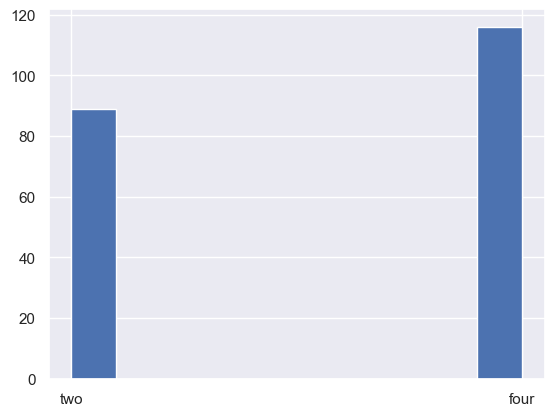

In [16]:
plt.hist(automobile_data['num-of-doors'])
plt.show()

In [17]:
automobile_data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
 width               0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


c:\users\91809\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='price', ylabel='Density'>

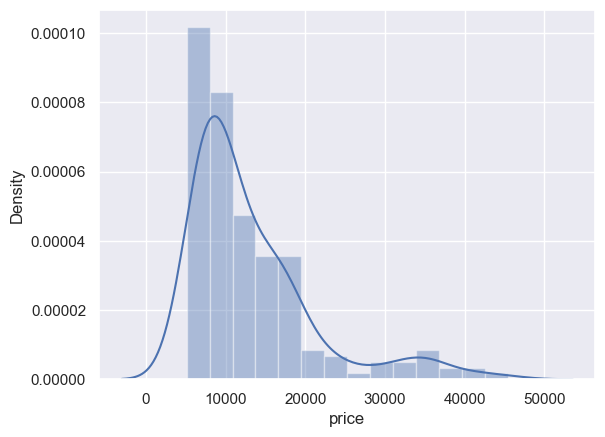

In [20]:
automobile_data['price'] = pd.to_numeric(automobile_data['price'], errors = 'coerce')
sns.distplot(automobile_data['price'])

<AxesSubplot:>

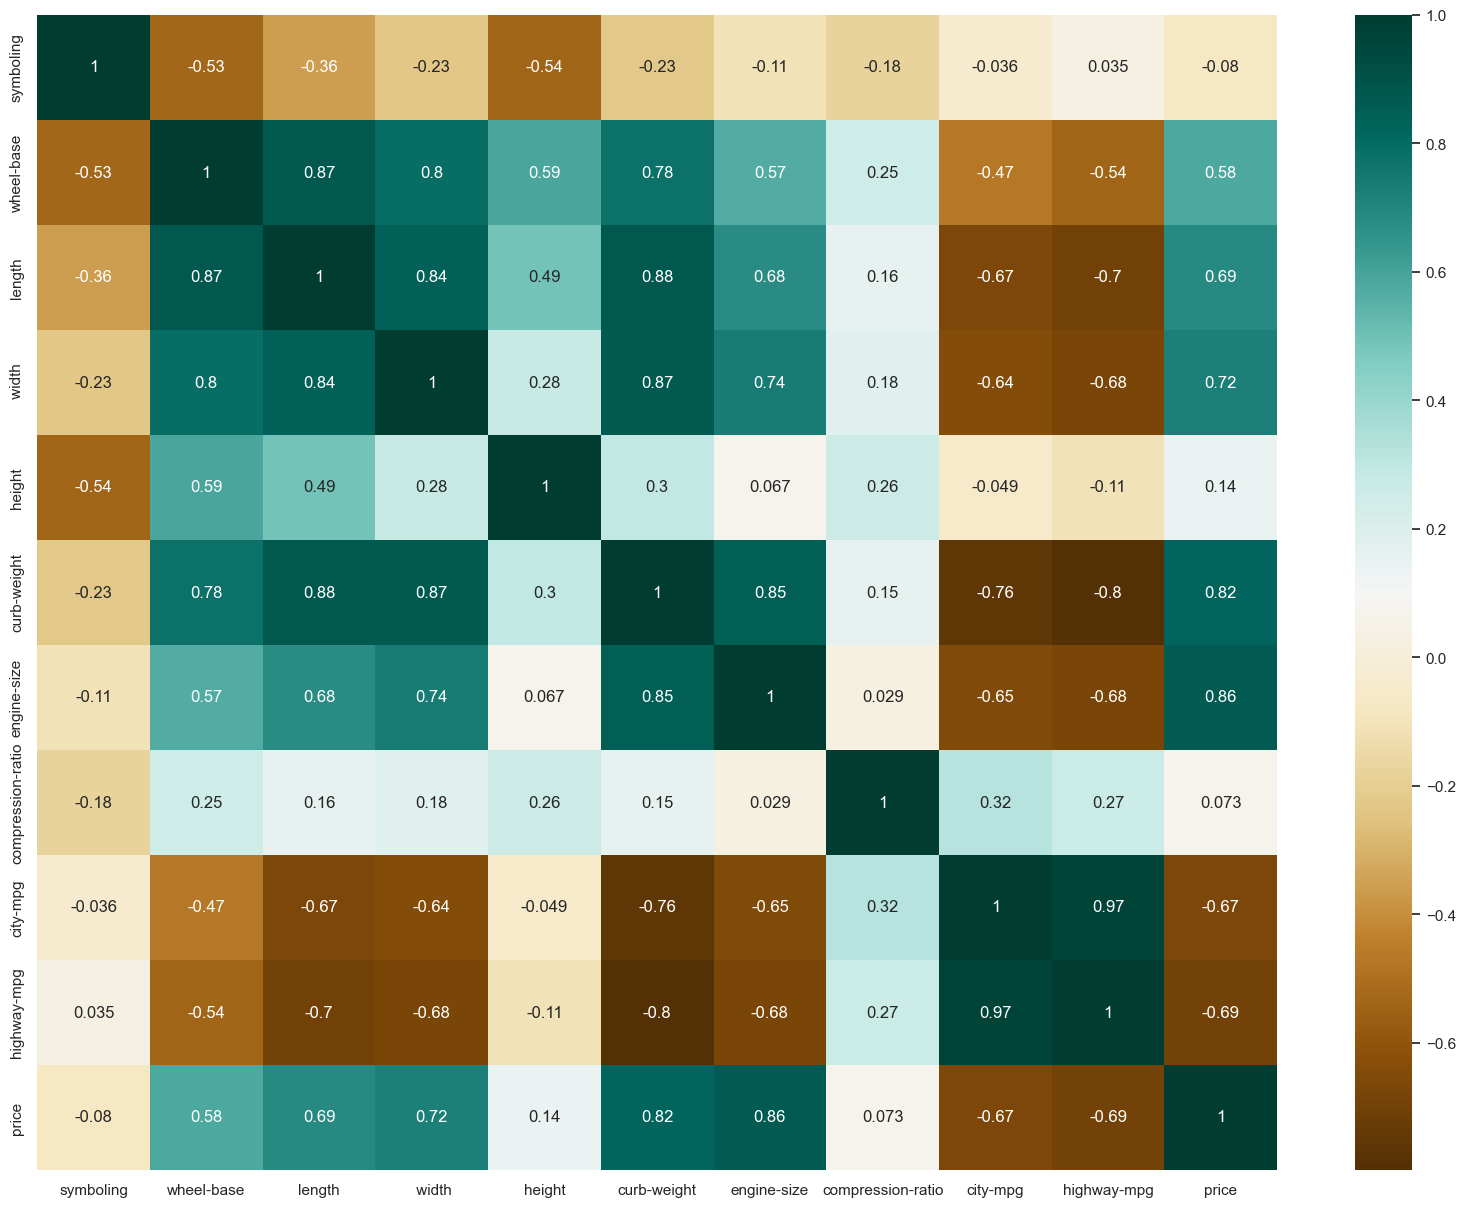

In [21]:
plt.figure(figsize = (20, 15))
c = automobile_data.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)

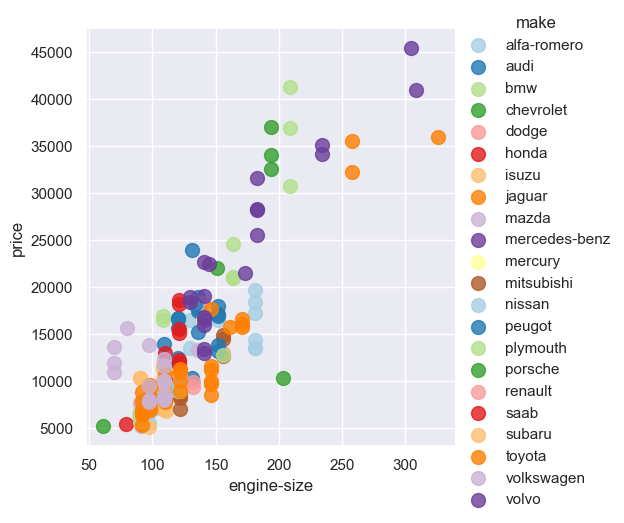

In [22]:
sns.lmplot(x='engine-size', y='price', data = automobile_data, fit_reg = False, hue ="make", palette = "Paired", scatter_kws = {"marker":"D","s":100})

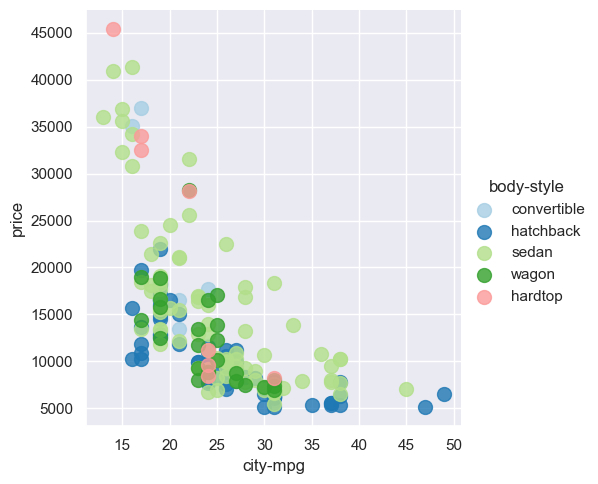

In [23]:
sns.lmplot(x='city-mpg', y= 'price', data = automobile_data, fit_reg = False, hue ="body-style", palette = "Paired", scatter_kws = {"marker":"D","s":100})

In [24]:
x = automobile_data[['engine-size', 'city-mpg']]
y = automobile_data.price
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 12345)

In [25]:
reg = LinearRegression()
model_fit = reg.fit(x_train, y_train)

In [26]:
model_fit.intercept_


597.4537790458598

In [27]:
model_fit.coef_

array([ 140.12847385, -214.9315153 ])

In [28]:
sale_price = model_fit.predict(np.array([[130,1]]))
sale_price

c:\users\91809\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([18599.22386446])

In [29]:
print("The sale price is =", sale_price)

The sale price is = [18599.22386446]


In [30]:
y = model_fit.intercept_+(130*model_fit.coef_[0]*model_fit.coef_[1])


In [31]:
print("the saleprice = ", y)

the saleprice =  -3914745.8250249447


In [32]:
train_pred = model_fit.predict(x_train)
mse = mean_squared_error(y_train, train_pred)
print('train rms : {}'.format(np.sqrt(mse)))
mae = mean_absolute_error = (y_train, train_pred)
print('train mae : {}'.format(mae))

train rms : 3790.921768293673
train mae : (203    22470.0
85      6989.0
33      6529.0
150     5348.0
185     8195.0
        ...   
126    32528.0
169     9989.0
164     8238.0
129    10295.0
29     12964.0
Name: price, Length: 153, dtype: float64, array([15327.86308974, 12319.83970645,  7041.32791441,  5966.67033791,
       10068.30651578, 10208.43498963, 15897.85459419, 10572.97258783,
        9563.64044374,  6752.61118857,  6237.44967657,  6752.61118857,
       16271.86980143, 21512.4711573 , 10638.29802023, 12104.90819115,
        6546.1394514 ,  6686.26792525, 24128.54194617,  7041.32791441,
        8853.52046543, 33526.62730327, 17813.2830138 , 21877.0087555 ,
        5041.61884431, 11609.71972815, 15160.31961966, 19064.96166942,
       11889.97667585, 14150.98747557, 10208.43498963, 15786.15894747,
       13469.3003244 , 12534.77122175,  9171.68784931,  6826.39639911,
       15878.8993761 ,  7667.16724222, 15897.85459419,  5358.76839728,
       26445.40056924,  8097.03027282,  

In [33]:
test_pred = model_fit.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print('train rms : {}'.format(np.sqrt(mse)))
mae = mean_absolute_error = (y_test, test_pred)
print('train mae : {}'.format(mae))

train rms : 4040.4605891669794
train mae : (78      6669.0
54      7395.0
20      6575.0
154     7898.0
52      6795.0
73     40960.0
175     9988.0
16     41315.0
94      7299.0
144     9233.0
98      8249.0
103    13499.0
66     18344.0
135    15510.0
116    17950.0
191    13295.0
148     8013.0
161     8358.0
14     24565.0
149    11694.0
27      8558.0
159     7788.0
30      6479.0
121     6692.0
92      6849.0
160     7738.0
109    12440.0
17     36880.0
19      6295.0
194    12940.0
146     7463.0
10     16430.0
100     9549.0
70     31600.0
49     36000.0
178    16558.0
47     32250.0
140     7603.0
111    15580.0
26      7609.0
132    11850.0
56     11845.0
196    15985.0
179    15998.0
93      7349.0
177    11248.0
134    15040.0
137    18620.0
117    18150.0
89      5499.0
67     25552.0
50      5195.0
Name: price, dtype: float64, array([ 6826.39639911,  6686.26792525,  5041.61884431,  7686.12246031,
        6686.26792525, 40747.98251116, 11889.97667585, 26445.40056924,
     

In [37]:
import pickle
pickle.dump(model_fit, open('model123.pkl','wb')) 